<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/11%EC%A3%BC%EC%B0%A8/AE_w11_WISDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auto Encoder - 위즈덤 데이터
WISDM.csv

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [67]:
#데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WISDM.csv', header=None)

df = df.iloc[1:].reset_index(drop=True)
df.columns = ['record_id', 'user_id', 'activity', 'timestamp', 'x_accel', 'y_accel', 'z_accel']

df

,record_id,user_id,activity,timestamp,x_accel,y_accel,z_accel
0,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...
1048569,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [68]:
#불필요한 열 삭제
df = df.drop(columns=['record_id', 'user_id', 'timestamp'])

df

,activity,x_accel,y_accel,z_accel
0,Jogging,5.012288,11.264028,0.953424
1,Jogging,4.903325,10.882658,-0.081722
2,Jogging,-0.612916,18.496431,3.023717
3,Jogging,-1.184970,12.108489,7.205164
4,Jogging,1.375655,-2.492524,-6.510526
...,...,...,...,...
1048569,Standing,-7.930000,5.430000,-0.990000
1048570,Standing,-7.970000,5.130000,-1.140000
1048571,Standing,-7.970000,5.220000,-1.380000
1048572,Standing,-7.930000,5.600000,-1.180000


In [69]:
df.shape

(1048574, 4)

In [70]:
df.isnull().values.any()

np.False_

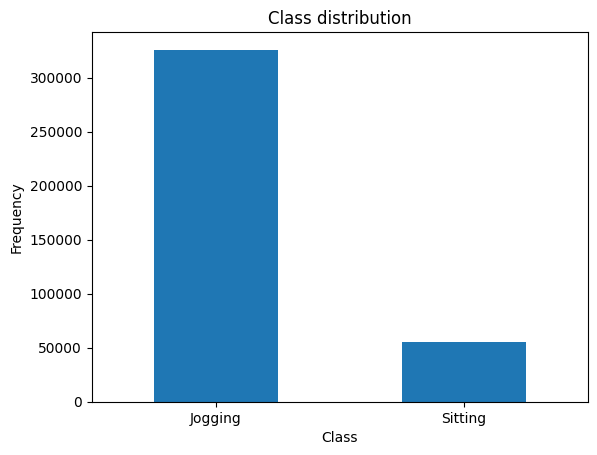

In [118]:
LABELS = ["Jogging", "Sitting"]

df = df[df['activity'].isin(['Jogging', 'Sitting'])]
count_classes = df['activity'].value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [119]:
frauds = df[df.activity == 1]
normal = df[df.activity == 0]

In [120]:
frauds.shape

(0, 4)

In [107]:
normal.shape

(0, 4)

In [108]:
RANDOM_SEED = 42

In [109]:
#train & test 나누기
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.activity == "Jogging"]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(260819, 3)

In [110]:
#오토 인코더 모델
input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [111]:
#오토 인코더 모델 학습
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 72.3688 - val_loss: 69.1200
Epoch 2/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69.5292 - val_loss: 69.0889
Epoch 3/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.5027 - val_loss: 69.0838
Epoch 4/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 69.3086 - val_loss: 69.0818
Epoch 5/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 69.6564 - val_loss: 69.0807
Epoch 6/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.7673 - val_loss: 69.0803
Epoch 7/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.3154 - val_loss: 69.0801
Epoch 8/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.3561 - val_loss: 69.0799
Epoch 9/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69.6626 - val_loss: 69.0799
Epoch 10/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.3541 - val_loss: 69.0799
Epoch 11/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.3653 - val_loss: 69.0798
Epoch 12/50
917/917 ━━━━━━━━━━

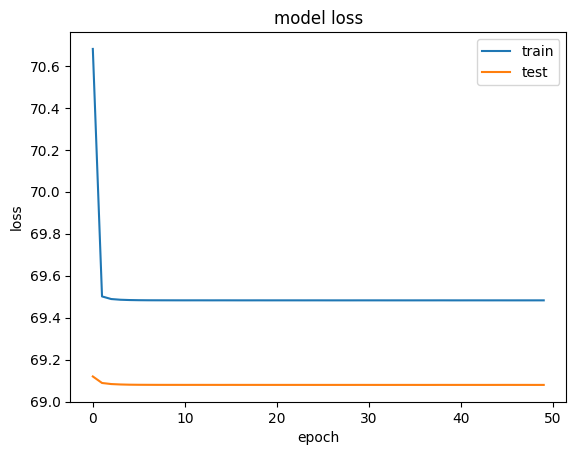

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [113]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step


,reconstruction_error
count,76170.000000
mean,62.739056
std,60.684932
min,0.000158
25%,19.031442
50%,35.074419
75%,102.894688
max,346.209767


In [114]:
error_df.head()

,reconstruction_error,true_class
469045,24.812069,Sitting
169577,30.290688,Jogging
639903,21.522400,Sitting
962556,127.684236,Jogging
546410,93.131070,Jogging


In [124]:
threshold = 15

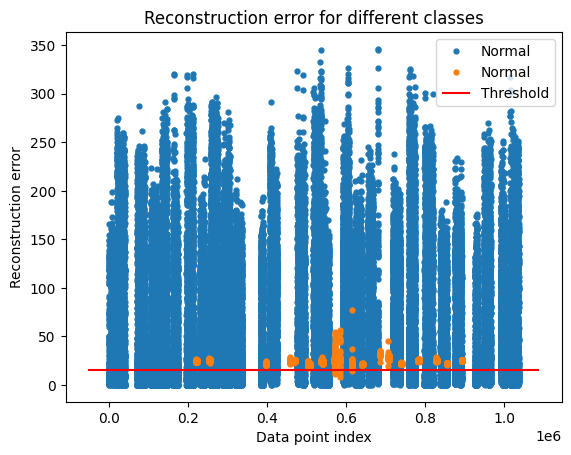

In [125]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

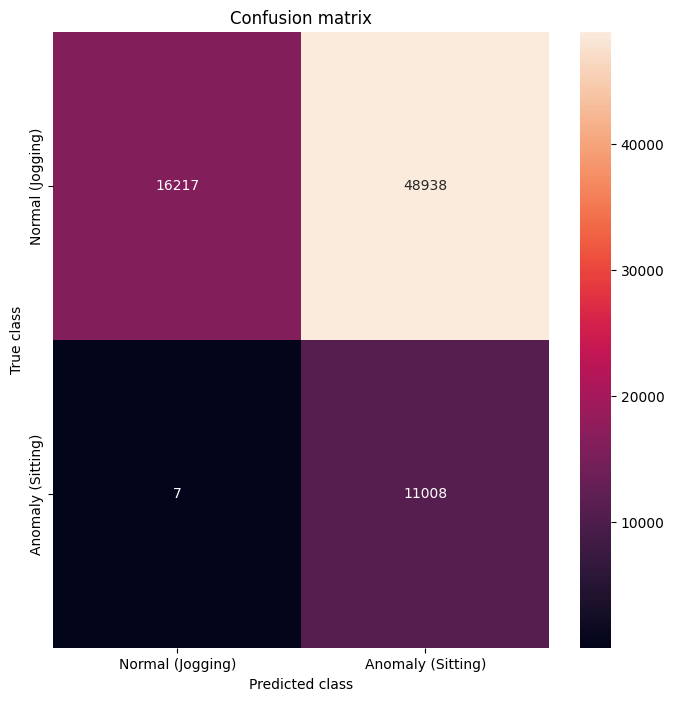

              precision    recall  f1-score   support

           0       1.00      0.25      0.40     65155
           1       0.18      1.00      0.31     11015

    accuracy                           0.36     76170
   macro avg       0.59      0.62      0.35     76170
weighted avg       0.88      0.36      0.39     76170



In [121]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Map string labels to numerical labels for true_class
# 'Jogging' (normal activity used for training) -> 0
# 'Sitting' (anomalous activity) -> 1
error_df['true_class_numeric'] = error_df['true_class'].apply(lambda x: 0 if x == 'Jogging' else 1)

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class_numeric, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=['Normal (Jogging)', 'Anomaly (Sitting)'], yticklabels=['Normal (Jogging)', 'Anomaly (Sitting)'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class_numeric, y_pred))